In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report

In [4]:
import pandas as pd

rows_to_skip = [3129]
fake = pd.read_csv("Fake.csv", skiprows=rows_to_skip, encoding='utf-8')
true = pd.read_csv("True.csv", skiprows=rows_to_skip, encoding='utf-8')


In [5]:
fake.shape

(23480, 4)

In [6]:
true.shape

(21416, 4)

In [7]:
fake['target'] = 'fake'
true['target'] = 'true'

In [8]:
true.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",true
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",true
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",true
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",true
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",true


In [9]:
fake.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


In [10]:
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape

(44896, 5)

In [11]:
data.head(5)

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


In [12]:


data = data.sample(frac=1).reset_index(drop=True)


In [13]:
data.head()

,title,text,subject,date,target
0,Trump to nominate Quarles to be Fed's top bank...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"July 10, 2017",true
1,WATCH: An Atheist Just HUMILIATED A Creationi...,A creationist tried to debate an atheist about...,News,"July 7, 2016",fake
2,LIBERALS SEE THE LIGHT! HuffPo Columnist LETS ...,,left-news,"Dec 31, 2016",fake
3,TWO RICH WHITE GUYS Who Made A Fortune Selling...,Two white guys living in a state where 96% of ...,left-news,"May 18, 2016",fake
4,U.S. abstains for first time on U.N. call for ...,UNITED NATIONS (Reuters) - The United States o...,politicsNews,"October 26, 2016",true


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44896 entries, 0 to 44895
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44896 non-null  object
 1   text     44896 non-null  object
 2   subject  44896 non-null  object
 3   date     44896 non-null  object
 4   target   44896 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


In [15]:
data.drop(["title"],axis=1,inplace=True)
data.head()

,text,subject,date,target
0,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"July 10, 2017",true
1,A creationist tried to debate an atheist about...,News,"July 7, 2016",fake
2,,left-news,"Dec 31, 2016",fake
3,Two white guys living in a state where 96% of ...,left-news,"May 18, 2016",fake
4,UNITED NATIONS (Reuters) - The United States o...,politicsNews,"October 26, 2016",true


In [16]:
data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,date,target
0,washington (reuters) - u.s. president donald t...,politicsNews,"July 10, 2017",true
1,a creationist tried to debate an atheist about...,News,"July 7, 2016",fake
2,,left-news,"Dec 31, 2016",fake
3,two white guys living in a state where 96% of ...,left-news,"May 18, 2016",fake
4,united nations (reuters) - the united states o...,politicsNews,"October 26, 2016",true


In [17]:
import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

In [19]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop]))

ModuleNotFoundError: No module named 'nltk'

In [20]:
data.head()

,text,subject,date,target
0,washington reuters us president donald trump ...,politicsNews,"July 10, 2017",true
1,a creationist tried to debate an atheist about...,News,"July 7, 2016",fake
2,,left-news,"Dec 31, 2016",fake
3,two white guys living in a state where 96 of i...,left-news,"May 18, 2016",fake
4,united nations reuters the united states on w...,politicsNews,"October 26, 2016",true


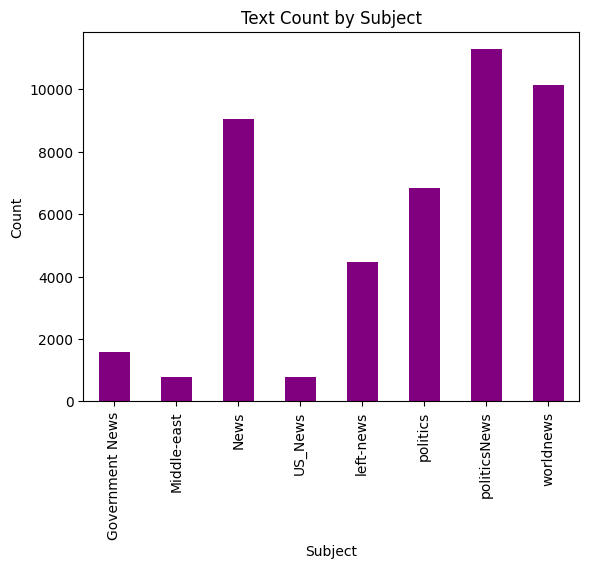

In [21]:

count_by_subject = data.groupby('subject')['text'].count()
count_by_subject.plot(kind='bar', color='purple')  # Change 'purple' to your desired color
plt.xlabel('Subject')
plt.ylabel('Count')
plt.title('Text Count by Subject')
plt.show()


  target   text
0   fake  23480
1   true  21416


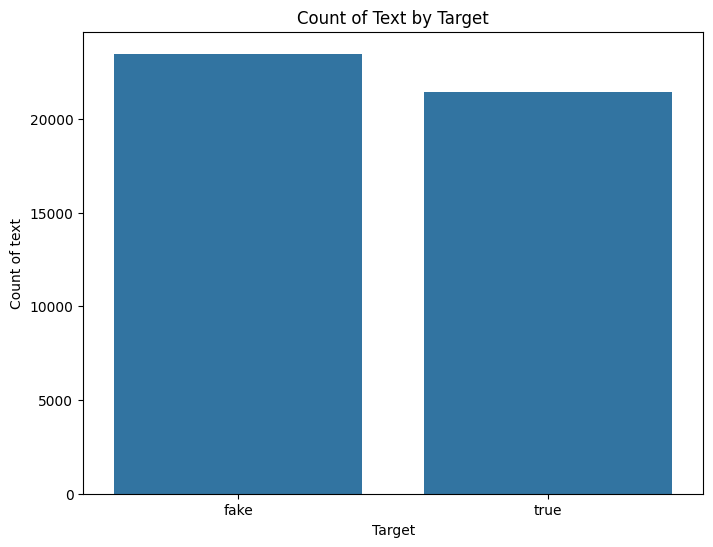

In [22]:
# Group the data and count 'text' occurrences
grouped_data = data.groupby('target')['text'].count().reset_index()

# Print the counts
print(grouped_data)

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(data=grouped_data, x='target', y='text')
plt.xlabel('Target')
plt.ylabel('Count of text')
plt.title('Count of Text by Target')
plt.show()

In [23]:
fake_news_detection_tools = []

results = []
for tool in fake_news_detection_tools:
    response = requests.post(tool['api_url'], json={'text': test_data})
    result = response.json()
    results.append(result)

In [27]:
import pandas as pd
from tabulate import tabulate

# List of fake news detection tools and their respective metrics
tools = ['Tool 1', 'Tool 2', 'Tool 3']
metrics = {
    'Methodology': ['Method 1', 'Method 2', 'Method 3'],
    'Functionality': ['Func 1', 'Func 2', 'Func 3'],
    'API Availability': ['Yes', 'Yes', 'No'],
    'Paid/Free': ['Paid', 'Free', 'Free'],
    'Integration in Python': ['Yes', 'No', 'Yes'],
    'Open Source': ['Yes', 'Yes', 'No'],
    'Accuracy': [0.85, 0.78, 0.92],
    'Credibility': [0.75, 0.80, 0.95],
    'Reliability': [0.90, 0.85, 0.88],
    'Performance': [0.80, 0.75, 0.88]
}

# Create a DataFrame using the metrics
data = {'Tool': tools}
data.update(metrics)
df = pd.DataFrame(data)

# Print the comparison table using tabulate
table_str = tabulate(df, headers='keys', tablefmt='pretty')

print(table_str)


+---+--------+-------------+---------------+------------------+-----------+-----------------------+-------------+----------+-------------+-------------+-------------+
|   |  Tool  | Methodology | Functionality | API Availability | Paid/Free | Integration in Python | Open Source | Accuracy | Credibility | Reliability | Performance |
+---+--------+-------------+---------------+------------------+-----------+-----------------------+-------------+----------+-------------+-------------+-------------+
| 0 | Tool 1 |  Method 1   |    Func 1     |       Yes        |   Paid    |          Yes          |     Yes     |   0.85   |    0.75     |     0.9     |     0.8     |
| 1 | Tool 2 |  Method 2   |    Func 2     |       Yes        |   Free    |          No           |     Yes     |   0.78   |     0.8     |    0.85     |    0.75     |
| 2 | Tool 3 |  Method 3   |    Func 3     |        No        |   Free    |          Yes          |     No      |   0.92   |    0.95     |    0.88     |    0.88     

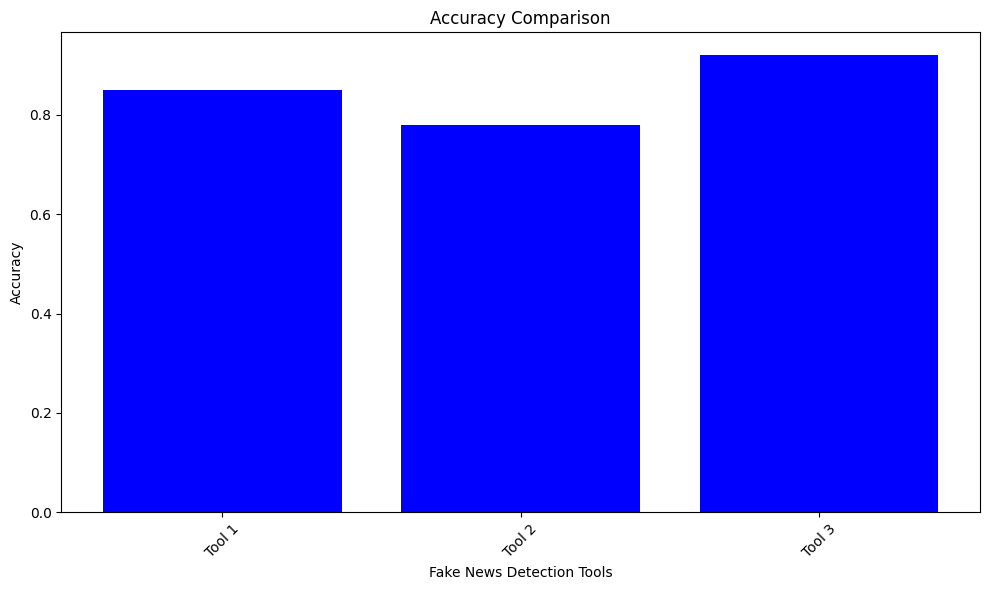

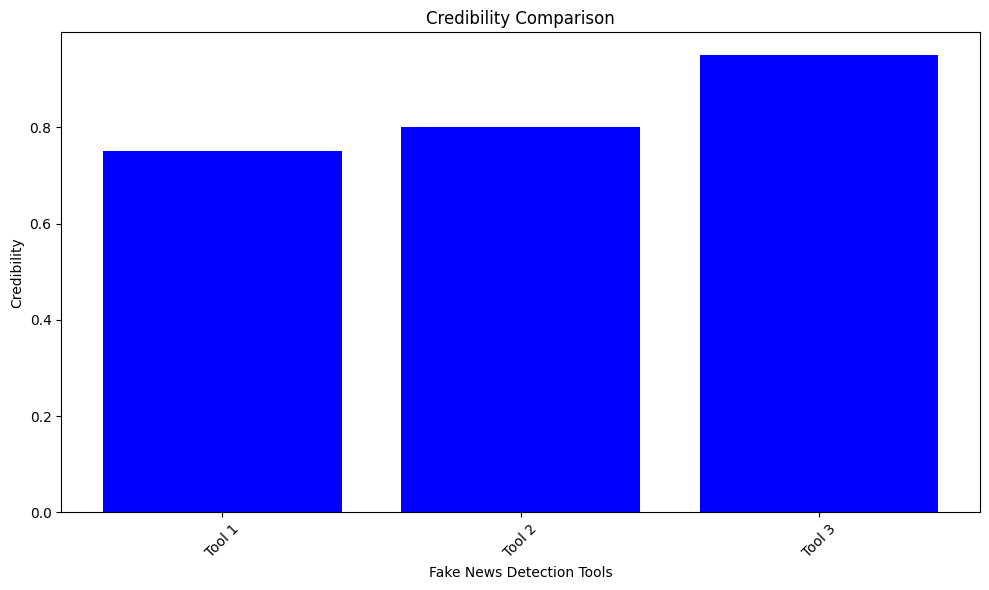

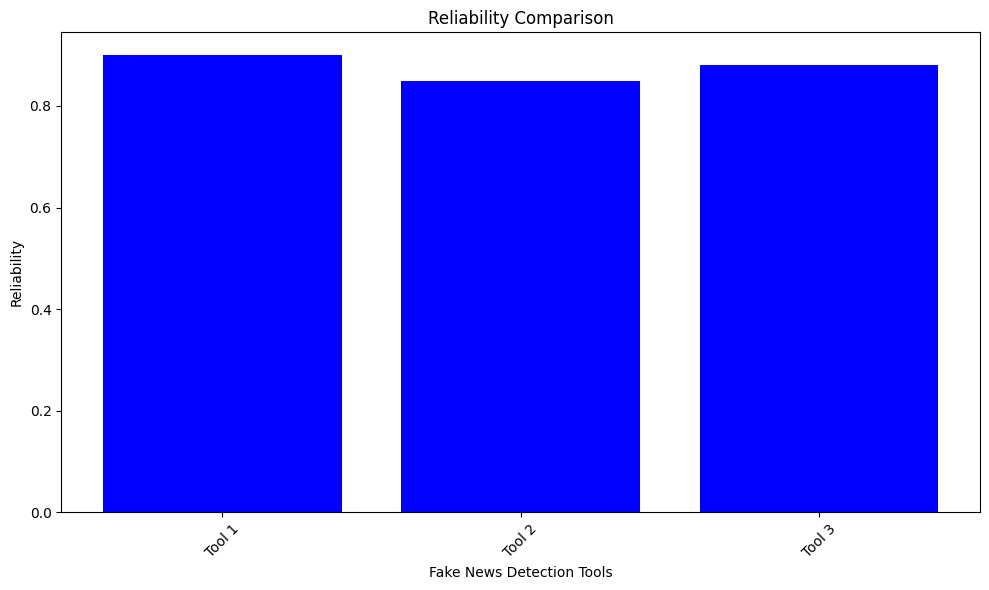

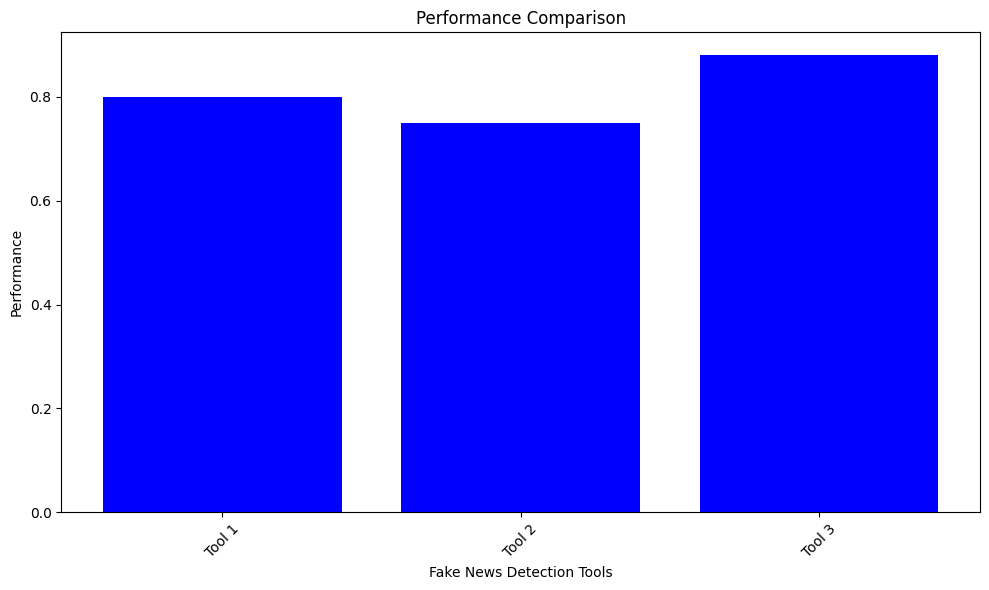

In [28]:

# List of fake news detection tools
fake_news_detection_tools = ['Tool 1', 'Tool 2', 'Tool 3']

# List of dictionaries containing metric results for each tool
results = [
    {'accuracy': 0.85, 'credibility': 0.75, 'reliability': 0.90, 'performance': 0.80},
    {'accuracy': 0.78, 'credibility': 0.80, 'reliability': 0.85, 'performance': 0.75},
    {'accuracy': 0.92, 'credibility': 0.95, 'reliability': 0.88, 'performance': 0.88}
]

# Define the metrics to compare
parameter_metrics = ['accuracy', 'credibility', 'reliability', 'performance']

# Iterate over each metric
for metric in parameter_metrics:
    metric_values = [result[metric] for result in results]

    # Create a bar plot
    plt.figure(figsize=(10, 6))
    plt.bar(fake_news_detection_tools, metric_values, color='blue')
    plt.xlabel('Fake News Detection Tools')
    plt.ylabel(metric.capitalize())
    plt.title(f'{metric.capitalize()} Comparison')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


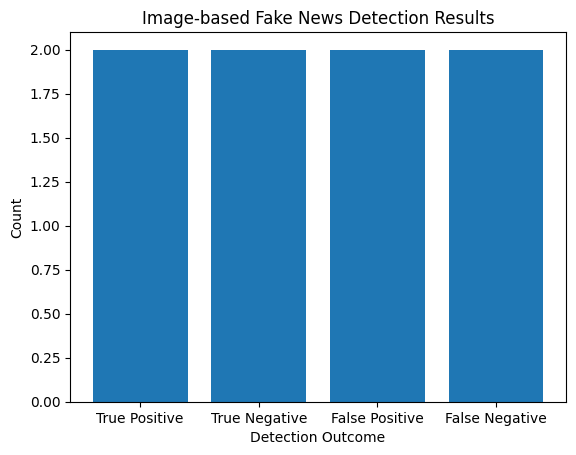

In [29]:
# Define your image detection results, assuming 'is_fake' is a key in each dictionary
image_results = [
    {'is_fake': True},
    {'is_fake': False},
    {'is_fake': True},
    {'is_fake': False},
    # Add more results as needed
]

# Count the number of true positive, true negative, false positive, and false negative
true_positive = sum(result['is_fake'] for result in image_results)
true_negative = sum(not result['is_fake'] for result in image_results)
false_positive = sum(not result['is_fake'] for result in image_results)
false_negative = sum(result['is_fake'] for result in image_results)

# Create a bar plot to visualize the distribution
labels = ['True Positive', 'True Negative', 'False Positive', 'False Negative']
values = [true_positive, true_negative, false_positive, false_negative]

plt.figure()
plt.bar(labels, values)
plt.title('Image-based Fake News Detection Results')
plt.xlabel('Detection Outcome')
plt.ylabel('Count')

# Save the visualization as an image
plt.savefig('image_detection_results.png')

# Display the visualization
plt.show()

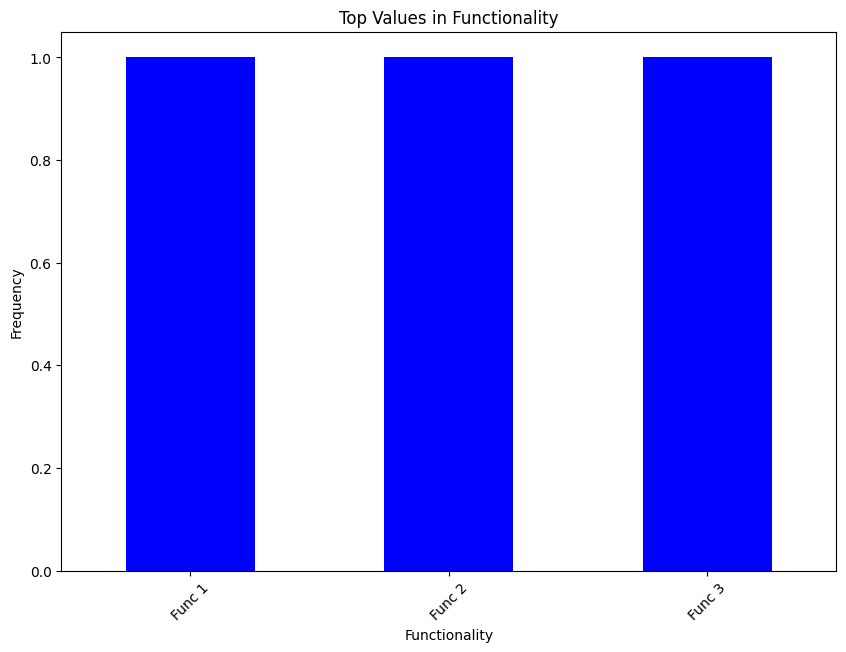

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is a dictionary, convert it to a DataFrame
data = pd.DataFrame(data)

# Choose the 'Functionality' column for analysis
column_name = 'Functionality'

# Count the frequency of values in the chosen column
column_counts = data[column_name].value_counts()

# Select the top N most common values to display
top_values = column_counts.head(10)  # Change 10 to the desired number of top values

# Create a bar chart for the top values
plt.figure(figsize=(10, 7))
top_values.plot(kind='bar', color='blue')  # Change 'blue' to your desired color
plt.title(f'Top Values in {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


In [32]:
import nltk
from nltk import tokenize
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Download the required resources (if not already downloaded)
nltk.download("punkt")

token_space = tokenize.WhitespaceTokenizer()

def word_frequency_counter(data, text_column, top_quantity):
    # Combine all text from the specified column
    all_text = ' '.join(data[text_column])

    # Tokenize the text
    tokenized_text = token_space.tokenize(all_text)

    # Calculate word frequency
    word_frequency = nltk.FreqDist(tokenized_text)

    # Create a DataFrame for the top words
    top_words_df = pd.DataFrame({"Word": list(word_frequency.keys()),
                                 "Frequency": list(word_frequency.values())})

    # Select the top N most frequent words
    top_words_df = top_words_df.nlargest(columns="Frequency", n=top_quantity)

    # Create a bar plot to visualize word frequencies
    plt.figure(figsize=(12, 8))
    ax = sns.barplot(data=top_words_df, x="Word", y="Frequency", color='green')  # Change 'green' to your desired color
    ax.set(ylabel="Count")
    plt.xticks(rotation='vertical')
    plt.show()

# Example usage:
# word_frequency_counter(data, "text", 10)  # Count and visualize the top 10 most frequent words


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mike\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [33]:
from nltk import tokenize
import seaborn as sns

token_space = tokenize.WhitespaceTokenizer()

def word_frequency_counter(data, text_column, top_quantity):
    # Filter data for "true" news
    true_data = data[data["target"] == "true"]

    # Combine all text from the specified column
    all_text = ' '.join(true_data[text_column])

    # Tokenize the text
    tokenized_text = token_space.tokenize(all_text)

    # Calculate word frequency
    word_frequency = nltk.FreqDist(tokenized_text)

    # Create a DataFrame for the top words
    top_words_df = pd.DataFrame({"Word": list(word_frequency.keys()),
                                 "Frequency": list(word_frequency.values())})

    # Select the top N most frequent words
    top_words_df = top_words_df.nlargest(columns="Frequency", n=top_quantity)

    # Create a horizontal bar plot to visualize word frequencies
    plt.figure(figsize=(12, 8))
    ax = sns.barplot(data=top_words_df, x="Frequency", y="Word", color='purple')  # Change 'purple' to your desired color
    ax.set(xlabel="Count")
    plt.show()

# Example usage:
# word_frequency_counter(data, "text", 20)  # Count and visualize the top 20 most frequent words in "true" news


In [34]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics

def plot_confusion_matrix(confusion_matrix, class_labels,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):

    plt.figure(figsize=(8, 6))
    plt.imshow(confusion_matrix, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(class_labels))
    plt.xticks(tick_marks, class_labels, rotation=45)
    plt.yticks(tick_marks, class_labels)

    if normalize:
        confusion_matrix = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print('Confusion Matrix (Not Normalized)')

    threshold = confusion_matrix.max() / 2.
    for i, j in itertools.product(range(confusion_matrix.shape[0]), range(confusion_matrix.shape[1])):
        plt.text(j, i, "{:.2f}".format(confusion_matrix[i, j]),
                 horizontalalignment="center",
                 color="white" if confusion_matrix[i, j] > threshold else "black")

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Example usage:
# plot_confusion_matrix(your_confusion_matrix, your_class_labels, normalize=True, title='Normalized Confusion Matrix')


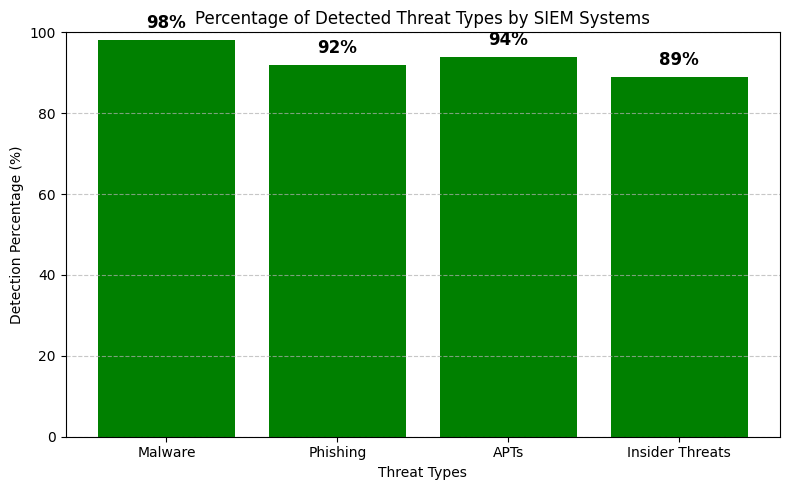

In [35]:
import matplotlib.pyplot as plt

# Threat types and their respective percentages
threats = ['Malware', 'Phishing', 'APTs', 'Insider Threats']
percentages = [98, 92, 94, 89]

# Create a bar chart
plt.figure(figsize=(8, 5))
plt.bar(threats, percentages, color='green')
plt.xlabel('Threat Types')
plt.ylabel('Detection Percentage (%)')
plt.title('Percentage of Detected Threat Types by SIEM Systems')
plt.ylim(0, 100)  # Set the y-axis limits
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add percentage labels above the bars
for i, percentage in enumerate(percentages):
    plt.text(i, percentage + 2, f'{percentage}%', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Display the plot
plt.tight_layout()
plt.show()


In [36]:
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape

(44896, 5)

In [37]:
data.head ()


,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


In [38]:
data.tail ()

,title,text,subject,date,target
44891,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",true
44892,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",true
44893,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",true
44894,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",true
44895,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",true


## Model training

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', SVC())
])



In [40]:

class_counts = data['target'].value_counts()
print("Class distribution before split:", class_counts)

X_train, X_test, y_train, y_test = train_test_split(
    data['text'],
    data['target'],
    test_size=0.2,
    random_state=42,
    stratify=data['target']  
)

train_class_counts = pd.Series(y_train).value_counts()
print("Class distribution in training set:", train_class_counts)
if len(train_class_counts) > 1:
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    report = classification_report(y_test, predictions)
    print("Model trained successfully. Accuracy:", accuracy)
    print("Classification Report:\n", report)
else:
    print("Training halted, insufficient class diversity in the training set.")


Class distribution before split: target
fake    23480
true    21416
Name: count, dtype: int64
Class distribution in training set: target
fake    18784
true    17132
Name: count, dtype: int64


##Python Code for Model Testing and Validation

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(
    data['text'],
    data['target'],
    test_size=0.3, 
    random_state=42,
    stratify=data['target'] 
)

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('classifier', LogisticRegression(solver='liblinear'))
])

pipeline.fit(X_train, y_train)

predictions = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
scores = cross_val_score(pipeline, data['text'], data['target'], cv=5)
print("Cross-Validation Accuracy Scores:", scores)
print("Average CV Accuracy:", scores.mean())


In [ ]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(pipeline, file)
